Hello Bridget!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Sprint 8: Supervised Learning Project

**Project Goal:** Using the Beta Bank customer datatset, build a model that will predict if a customer is going to leave the bank soon. Download, prepare, and examine the data to build and improve a classification model which must have an F1 score of 0.59 to pass. 

## Download and Prepare Dataset

In [28]:
#Import libraries

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

### Download Data

In [29]:
#Download data and review df info

data = pd.read_csv("/datasets/Churn.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Review Data

In [30]:
#Review a sample of the data

data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1583,1584,15730394,Crowther,709,France,Female,43,8.0,0.00,2,0,0,168035.62,1
3945,3946,15652789,Hancock,657,Spain,Male,40,10.0,0.00,2,1,1,52990.70,0
4519,4520,15713769,Michelides,617,Spain,Male,38,7.0,0.00,1,1,1,27239.28,0
2834,2835,15649124,Fang,850,France,Male,30,NaN,121535.18,1,0,0,40313.47,0
2354,2355,15669342,Ferri,731,Germany,Male,35,2.0,127862.93,2,1,0,139083.70,0
3880,3881,15726945,Andreev,677,France,Female,72,8.0,0.00,2,1,1,153604.44,0
423,424,15622834,Stevenson,678,France,Female,35,4.0,0.00,1,1,0,125518.32,0
6212,6213,15638231,Chung,730,Spain,Female,62,2.0,0.00,2,1,1,162889.10,0
5737,5738,15575428,Mistry,682,Germany,Female,35,2.0,117438.92,2,1,1,16910.98,0
4807,4808,15753248,Tao,611,France,Male,28,2.0,0.00,2,0,0,25395.83,0


**Observations:** The target feature is the 'Exited' column, values are indicated by 0/False has not exited (customer remains at the bank) or 1/True that customer has exited.

### Prepare the data

**Feature Preparation:**

There are 3 columns that can be dropped which do not contribute classification information in the dataset and instead had unique values for each row/observation.

There are 2 feature columns which must be converted from categorical into numerical

Will use StandardScaler and check scores

In [31]:
#Drop unnecessary columns that have unique values instead of classification data
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [32]:
#Check for missing values
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [33]:
#Fill missing values with median since tenure is ordinal data
median = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(median)

data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Median is okay. But if you read the description of the Tenure feature you can come up with better constant than median.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you I read the description and thought mode would be a better choice and than ran into so many issues using it. Then I met with a tutor and they said median or average and recommended since your comment was yellow and not red that I should leave it as median.
</div>

<div class="alert alert-block alert-info">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Yeah, you can leave median. But I meant not mode but just 0. Just think a bit what can mean NaN in Tenure.

</div>

In [34]:
#Transform categorical features into numerical ['Geography', 'Gender']
#Check the unique values for each feature and their order
print("Geography Feature Unique Values:", data['Geography'].unique())
print("Gender Feature Unique Values:", data['Gender'].unique())

Geography Feature Unique Values: ['France' 'Spain' 'Germany']
Gender Feature Unique Values: ['Female' 'Male']


**Observations:** 

'Gender': 'Female'=0 'Male'=1

'Geography': 'France'=0, 'Spain'=1, 'Germany'=2

In [35]:
#Use get_dummies for 'Gender' feature because it only has 2 unique values
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(1), uint8(1)
memory usage: 791.1+ KB
None


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2.0,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8.0,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7.0,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4.0,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4.0,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2.0,134603.88,1,1,1,71725.73,0


In [36]:
#Use Label Encoding on 'Geography' because it has 3 unique values
categorical_column = data.select_dtypes(include=['object']).columns
   
encoder = OrdinalEncoder()
data[categorical_column] = encoder.fit_transform(data[categorical_column])

#Review the transformed values
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  uint8  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(4), int64(6), uint8(1)
memory usage: 791.1 KB
None


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0,43,2.0,125510.82,1,1,1,79084.10,0
5,645,2.0,1,44,8.0,113755.78,2,1,0,149756.71,1
6,822,0.0,1,50,7.0,0.00,2,1,1,10062.80,0
7,376,1.0,0,29,4.0,115046.74,4,1,0,119346.88,1
8,501,0.0,1,44,4.0,142051.07,2,0,1,74940.50,0
9,684,0.0,1,27,2.0,134603.88,1,1,1,71725.73,0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Actually LabelEncoding overwrites the result of get_dummies with the same result. So, the part with get_dummies does nothing here at all and can be removed.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

First I used get_dummies for the 'Gender' feature then LabelEncoding for 'Geography'. Since the get_dummies code is first and changes that datatype to uint8, how does LabelEncoding code affect the latter if it looks for object data type? So because of that I'm unsure what to change because I thought that's how the code is working.
</div>

<div class="alert alert-block alert-info">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Yeah, you're right, sorry. But the function get_dummies with drop_first=True for binary features creates a column with 0 and 1, right? OrdinalEncoder does absolutely the same for binary feature.

</div>

In [37]:
#Check balance of target data

print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


**Observations:**

Target data is imbalanced in favor 0/False clients that have not exited (remain at the bank).

## Exploratory Data Analysis

<AxesSubplot:>

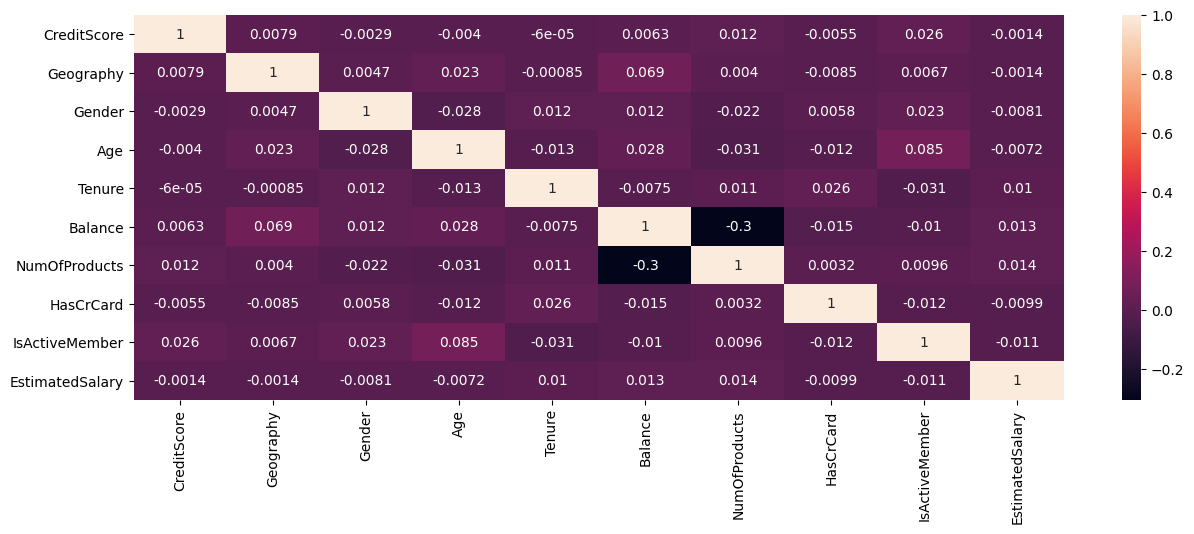

In [38]:
#Looking for highly correlated features that could distrupt model training

plt.figure(figsize=(15,5))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True)

**Observations:** There doesn't appear to be any highly correlated features.

## Split the Source Data

In [39]:
#First use train_test_split to create 2 df's, one is test, the other is temp df to split further into train and validation
df_temp, df_test = train_test_split(data, test_size=0.20, random_state=315)

#Then use the temp df from first function to create 2 more df's, train and validation
df_train, df_valid = train_test_split(df_temp, test_size=0.25, random_state=315)

#Verify the datasets
print("Training dataset: ", df_train.shape)
print("Testing dataset: ", df_test.shape)
print("Validation dataset: ", df_valid.shape)

Training dataset:  (6000, 11)
Testing dataset:  (2000, 11)
Validation dataset:  (2000, 11)


In [40]:
#Create feature and target datasets for each

#Train datasets
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

#Validation datasets
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

#Test datasets
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

In [41]:
#Scale the datasets
#Initialize scaler
scaler = StandardScaler()

# Fit on the training data
features_train_scaled = scaler.fit_transform(features_train)

# Transform the datasets
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)

# Convert the scaled numpy arrays back to DataFrames
#features_train_scaled = pd.DataFrame(features_train_scaled, columns=features_train.columns)
#features_valid_scaled = pd.DataFrame(features_valid_scaled, columns=features_valid.columns)
#features_test_scaled = pd.DataFrame(features_test_scaled, columns=features_test.columns)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Okay, but it's better to show such moments in experiments than to just write about it.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I ran the code and added another cell below showing the scores are lower for scaled data and added analysis
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Thank you!

</div>

## Train Models

### Scaled Features Models

In [42]:
#Train decision tree model
decision_tree_scaled = DecisionTreeClassifier(random_state=315)
decision_tree_scaled.fit(features_train_scaled, target_train)
dt_predicted_valid_scaled = decision_tree_scaled.predict(features_valid)

#Train random forest model
random_forest_scaled = RandomForestClassifier(random_state=315)
random_forest_scaled.fit(features_train_scaled, target_train)
rf_predicted_valid_scaled = random_forest_scaled.predict(features_valid)

#Train logistic regression using solver='liblinear' hyperparamter
logistic_regression_scaled = LogisticRegression(random_state=315, solver='liblinear') 
logistic_regression_scaled.fit(features_train_scaled, target_train)
lr_predicted_valid_scaled = logistic_regression_scaled.predict(features_valid)

#F1 scores
#Decision Tree
print("Scaled Models F1 Scores")
print()
print("Decision Tree F1 Score:", f1_score(target_valid, dt_predicted_valid_scaled)*100)

#Random Forest
print("Random Forest F1 Score:", f1_score(target_valid, rf_predicted_valid_scaled)*100)

#Logistic Regression
print("Logistic Regression F1 Score:", f1_score(target_valid, lr_predicted_valid_scaled)*100)

#AUC-ROC metric
#Decision Tree

probabilities_valid_dt_scaled = decision_tree_scaled.predict_proba(features_valid_scaled)
probabilities_one_valid_dt_scaled = probabilities_valid_dt_scaled[:, 1]

auc_roc_dt_scaled = roc_auc_score(target_valid, probabilities_one_valid_dt_scaled)

#Random Forest

probabilities_valid_rf_scaled = random_forest_scaled.predict_proba(features_valid_scaled)
probabilities_one_valid_rf_scaled = probabilities_valid_rf_scaled[:, 1]

auc_roc_rf_scaled = roc_auc_score(target_valid, probabilities_one_valid_rf_scaled)

#Logistic Regression

probabilities_valid_lr_scaled = logistic_regression_scaled.predict_proba(features_valid_scaled)
probabilities_one_valid_lr_scaled = probabilities_valid_lr_scaled[:, 1]

auc_roc_lr_scaled = roc_auc_score(target_valid, probabilities_one_valid_lr_scaled)

print()
print("Scaled Models AUC-ROC Scores")
print()
print("Decision Tree:", auc_roc_dt_scaled*100)
print("Random Forest:", auc_roc_rf_scaled*100)
print("Logistic Regression:", auc_roc_lr_scaled*100)

Scaled Models F1 Scores

Decision Tree F1 Score: 32.202052091554854
Random Forest F1 Score: 20.36630036630037
Logistic Regression F1 Score: 33.22147651006711

Scaled Models AUC-ROC Scores

Decision Tree: 67.22219085439683
Random Forest: 84.25938995853173
Logistic Regression: 76.1700198872013


### Unscaled Features Models

In [43]:
#Train inital decision tree model
decision_tree = DecisionTreeClassifier(random_state=315)
decision_tree.fit(features_train, target_train)
dt_predicted_valid = decision_tree.predict(features_valid)

#Train initial random forest model
random_forest = RandomForestClassifier(random_state=315)
random_forest.fit(features_train, target_train)
rf_predicted_valid = random_forest.predict(features_valid)

#Train initial logistic regression using solver='liblinear' hyperparamter
logistic_regression = LogisticRegression(random_state=315, solver='liblinear') 
logistic_regression.fit(features_train, target_train)
lr_predicted_valid = logistic_regression.predict(features_valid)

#Initial F1 scores
#Decision Tree
print("Unscaled Models F1 Scores")
print()
print("Decision Tree F1 Score:", f1_score(target_valid, dt_predicted_valid)*100)

#Random Forest
print("Random Forest F1 Score:", f1_score(target_valid, rf_predicted_valid)*100)

#Logistic Regression
print("Logistic Regression F1 Score:", f1_score(target_valid, lr_predicted_valid)*100)

#Initial AUC-ROC metric
#Decision Tree

probabilities_valid_dt = decision_tree.predict_proba(features_valid)
probabilities_one_valid_dt = probabilities_valid_dt[:, 1]

auc_roc_dt = roc_auc_score(target_valid, probabilities_one_valid_dt)

#Random Forest

probabilities_valid_rf = random_forest.predict_proba(features_valid)
probabilities_one_valid_rf = probabilities_valid_rf[:, 1]

auc_roc_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)

#Logistic Regression

probabilities_valid_lr = logistic_regression.predict_proba(features_valid)
probabilities_one_valid_lr = probabilities_valid_lr[:, 1]

auc_roc_lr = roc_auc_score(target_valid, probabilities_one_valid_lr)

print()
print("Unscaled Models AUC-ROC Scores")
print()
print("Decision Tree:", auc_roc_dt*100)
print("Random Forest:", auc_roc_rf*100)
print("Logistic Regression:", auc_roc_lr*100)


Unscaled Models F1 Scores

Decision Tree F1 Score: 46.72435105067985
Random Forest F1 Score: 58.97035881435257
Logistic Regression F1 Score: 9.251101321585903

Unscaled Models AUC-ROC Scores

Decision Tree: 66.81487964165396
Random Forest: 84.28981674916405
Logistic Regression: 65.22170778988577


**Observations:** 

The scores were overall much lower for the scaled features dataset. Will work with the unscaled features dataset for the remainder of the project.

The highest F1 and AUC-ROC scores are for Random Forest model. Will focus on retraining that one and improving score.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!
</div>

## Retrain Models

### Adjust for Class Imbalance

In [44]:
#First method class imbalance adjustment via sklearn class_weight parameter
#Retrain models with class_weight=balanced parameter
#Decision Tree
decision_tree_balanced1 = DecisionTreeClassifier(class_weight='balanced', random_state=315)
decision_tree_balanced1.fit(features_train, target_train)
dt_balanced1_predicted_valid = decision_tree_balanced1.predict(features_valid)

print("First Method Class Balance via 'class_weight' Parameter F1 scores")
print()
print("Decision Tree F1 Score:", f1_score(target_valid, dt_balanced1_predicted_valid)*100)


#Random Forest
random_forest_balanced1 = RandomForestClassifier(class_weight='balanced', random_state=315)
random_forest_balanced1.fit(features_train, target_train)
rf_balanced1_predicted_valid = random_forest_balanced1.predict(features_valid)

print("Random Forest F1 Score:", f1_score(target_valid, rf_balanced1_predicted_valid)*100)

#Logistic Regression
logistic_regression_balanced1 = LogisticRegression(class_weight='balanced', random_state=315, solver='liblinear') 
logistic_regression_balanced1.fit(features_train, target_train)
lr_balanced1_predicted_valid = logistic_regression_balanced1.predict(features_valid)

print("Logistic Regression F1 Score:", f1_score(target_valid, lr_balanced1_predicted_valid)*100) 

First Method Class Balance via 'class_weight' Parameter F1 scores

Decision Tree F1 Score: 46.441947565543074
Random Forest F1 Score: 57.09728867623603
Logistic Regression F1 Score: 41.5


**Observations:** This first method to address the class imbalance using the class_weight=balanced hyperparameter lowered the Random Forest score but it increased the Logistic Regression score.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [45]:
#Second method class imbalance adjustment via upsampling
#Combine the training features and target dataset

train_data = pd.concat([features_train, target_train], axis=1)

#Define the majority and minority target data
majority_class = train_data[train_data.Exited == 0]
minority_class = train_data[train_data.Exited == 1]

#Upsample the minority data
minority_upsampled = resample(minority_class, 
                              replace=True, 
                              n_samples=len(majority_class), 
                              random_state=315)

#Combine the upsampled minority data with the majority data
upsampled_train = pd.concat([majority_class, minority_upsampled])

# Separate features and target data
features_upsampled = upsampled_train.drop('Exited', axis=1)
target_upsampled = upsampled_train['Exited']

**Analysis Notes:** Chose upsampling instead of downsampling to preserve the majority class dataset

In [46]:
#Retrain the Decision Tree model with upsampled training set
decision_tree_balanced2 = DecisionTreeClassifier(random_state=315)
decision_tree_balanced2.fit(features_upsampled, target_upsampled)
dt_balanced2_predicted_valid = decision_tree_balanced2.predict(features_valid)

print('Second Method Class Balance via Upsampling')
print()
print('Decision Tree F1:', f1_score(target_valid, dt_balanced2_predicted_valid)*100)

#Train Random Forest model with upsampled training set
random_forest_balanced2 = RandomForestClassifier(random_state=315)
random_forest_balanced2.fit(features_upsampled, target_upsampled)
rf_balanced2_predicted_valid = random_forest_balanced2.predict(features_valid)

print('Random Forest F1:', f1_score(target_valid, rf_balanced2_predicted_valid)*100)

#Train Logistic Regression model with upsampled training set
logistic_regression_balanced2 = LogisticRegression(random_state=315, solver='liblinear') 
logistic_regression_balanced2.fit(features_upsampled, target_upsampled)
lr_balanced2_predicted_valid = logistic_regression_balanced2.predict(features_valid)

print('Logistic Regression F1:', f1_score(target_valid, lr_balanced2_predicted_valid)*100)

Second Method Class Balance via Upsampling

Decision Tree F1: 49.36708860759494
Random Forest F1: 60.94182825484765
Logistic Regression F1: 41.946308724832214


**Observations:** This second method to address the class imbalance using upsampling increased the Random Forest score.

Will use upsampled dataset to retrain random forest model

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Okay, good job
</div>

### Retrain Random Forest Model

In [47]:
#Tuning hyperparameters for rf model

#param_grid = { 'n_estimators': [100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'bootstrap': [True, False]
#}

#random_forest_retrain2 = RandomForestClassifier(random_state=315)
#grid_search = GridSearchCV(estimator=random_forest_retrain2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#grid_search.fit(features_train, target_train)

#best_params = grid_search.best_params_
#print(f"Best hyperparameters: {best_params}")

**Analysis Notes:** This code ran for almost an hour so commenting it out so it doesn't run again

In [48]:
#Retrain Random Forest model with hyperparameters and upsampled data set
random_forest_upsample = RandomForestClassifier(random_state=315, n_estimators=300, bootstrap=True, max_depth=20,
                                               max_features='auto', min_samples_leaf=2, min_samples_split=2)
random_forest_upsample.fit(features_upsampled, target_upsampled)

rf_upsample_predicted_valid = random_forest_upsample.predict(features_valid)

#AUC-ROC validation score 
probabilities_valid_rf_upsample = random_forest_upsample.predict_proba(features_valid)
probabilities_one_valid_rf_upsample = probabilities_valid_rf_upsample[:, 1]

auc_roc_rf_upsample = roc_auc_score(target_valid, probabilities_one_valid_rf_upsample)

#Random Forest Test Data scoring code
#F1
rf_upsample_predicted_test = random_forest_upsample.predict(features_test)

#AUC-ROC
probabilities_test_rf_upsample = random_forest_upsample.predict_proba(features_test)
probabilities_one_test_rf_upsample = probabilities_test_rf_upsample[:, 1]

auc_roc_rf_upsample_test = roc_auc_score(target_test, probabilities_one_test_rf_upsample)

print("Upsampled Dataset")
print()
print("Random Forest Validation Data")
print('Random Forest F1:', f1_score(target_valid, rf_upsample_predicted_valid)*100)
print('AUC-ROC:', auc_roc_rf_upsample*100)
print()
print("Random Forest Test Data")
print('Random Forest F1:', f1_score(target_test, rf_upsample_predicted_test)*100)
print('AUC-ROC:', auc_roc_rf_upsample_test*100)

Upsampled Dataset

Random Forest Validation Data
Random Forest F1: 61.19205298013245
AUC-ROC: 84.7020683944065

Random Forest Test Data
Random Forest F1: 62.15139442231076
AUC-ROC: 86.54475000432124


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

There was a red reviewer comment after my final retrained model stating that I was missing the F1 and AUC-ROC scores on the Test dataset. I must have accidentally deleted that comment.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done!

</div>

## Project Conclusion:

### First Submission:
**Best trained model:** Random Forest w/out adjusting for class imbalance

**Initial RF model scores**
F1: 58.69
AUC-ROC: 84.29

**Final RF model scores**
F1: 59.1
AUC-ROC: 85

**Feature Preparation:**
At the time I prepared the data, I was unsure what model I'd be using so I performed StandardScaler on the features but that isn't useful for Random Forest model so I went back and removed that code when I decided to use the RF model

**Class Imbalance**
I found 4 methods of handling class imbalance decreased the F1 score on the RF model so the final trained model uses the initial training dataset. I left the code for the initial 2 I thought would be best which were class_weight='balanved' hyperparameter and upsampling. After these 2 didn't improved scores I tried downsampling and SMOTE just to see what would happen but the scores decreased with those methods as well

**Tuning Hyperparameters:**
I used two methods I learned from the material first for max_depth and n_estimators but the best scored values for both found lowered the RF F1 score as well. So I tried the hyperparameters tuning code using the param_grid for more parameters than just those 2 and those results improved the F1 score.

**Scoring:**
The final F1 score of 59 indicates that I increased the model's harmony between precision and recall from 58.97 which is a small increase. F1 score focus on performance in respect to the positive class and can be sensitive to imbalanced datasets which this final model was trained with an imbalanced dataset but oddly enough had a lower score when I balanced the datasets.

The final AUC-ROC score of 85 indicates that I increased the model's performance in regards to all possible thresholds from 84.29 but again this is a small increase.

### Second Submission:

**Best trained model:** Random Forest with upsampled dataset

**First Random Forest model scores (Scaled dataset with no class imbalance adjustments)**

F1: 20.36

AUC-ROC: 84.29

**Final Random Forest model scores(Unscaled, Upsampled data, hyperparameter tuning)**

Validation data

F1: 61.19

AUC-ROC: 84.70

Test data

F1: 62.15

AUC-ROC:86.54

**Notes:** After reviewing the feedback from first submission and making the necessary edits. I found that when I reprocessed everything I was actually getting better scores from the upsampled data, when previously that was not the case.

So I submitted second submission project conclusion notes with these details but left the first submission conclusion notes